In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

from sklearn import tree, linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import *


In [252]:
df_final_zip = pd.read_csv("df_final_zip.csv")

Linear Regression sans Normalisarion

In [253]:
model = linear_model.LinearRegression()
new_data = df_final_zip[['price','sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','house_age', 'zipcode_98004', 'zipcode_98039', 'zipcode_98040'
]]

In [254]:
new_data.describe()


,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,house_age,zipcode_98004,zipcode_98039,zipcode_98040
count,2.139700e+04,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000,21397.000000
mean,5.181830e+05,2050.579707,7.626303,1766.311866,1971.626677,2.098525,0.216385,284.267841,3.361630,47.559461,0.005328,43.334580,0.012946,0.001355,0.012198
std,2.847527e+05,861.483593,1.135392,791.713655,668.086144,0.745611,0.729494,430.395339,0.897603,0.139047,0.072799,29.309064,0.113043,0.036791,0.109771
min,7.500000e+04,290.000000,1.000000,290.000000,399.000000,0.500000,0.000000,0.000000,1.000000,47.155900,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,1420.000000,7.000000,1190.000000,1480.000000,1.500000,0.000000,0.000000,3.000000,47.469100,0.000000,18.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,1900.000000,7.000000,1550.000000,1830.000000,2.250000,0.000000,0.000000,3.000000,47.570700,0.000000,40.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,2520.000000,8.000000,2190.000000,2340.000000,2.500000,0.000000,550.000000,4.000000,47.678400,0.000000,63.000000,0.000000,0.000000,0.000000
max,1.965000e+06,7730.000000,13.000000,7420.000000,5790.000000,7.500000,4.000000,3260.000000,11.000000,47.777600,1.000000,115.000000,1.000000,1.000000,1.000000


In [255]:
X = new_data.drop('price', axis=1)
y = new_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))


0.7494577120982124


In [256]:
""" X.to_csv(r'df_sans_header.csv', index = False, header = False)
y.to_csv(r'tafget_sans_header.csv', index = False, header = False) """

" X.to_csv(r'df_sans_header.csv', index = False, header = False)\ny.to_csv(r'tafget_sans_header.csv', index = False, header = False) "

In [257]:
X.columns

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'house_age',
       'zipcode_98004', 'zipcode_98039', 'zipcode_98040'],
      dtype='object')

In [258]:
def prix(model, sqft_living = 3940, grade = 9, sqft_above = 3940, sqft_living15 = 2370, bathrooms = 3.75, view = 3, sqft_basement = 0, bedrooms = 5.0, lat = 47.6203, waterfront = 0, house_age = 64, zipcode_98004 = 1, zipcode_98039 = 0, zipcode_98040 = 0):
    x = np.array([sqft_living, grade, sqft_above, sqft_living15, bathrooms, view, sqft_basement, bedrooms, lat, waterfront, house_age, zipcode_98004, zipcode_98039, zipcode_98040]).reshape(1,14)
    print(model.predict(x))


In [259]:
prix(model)



[1585224.63176959]


/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [260]:
df_final_zip.price[0]


1965000.0

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


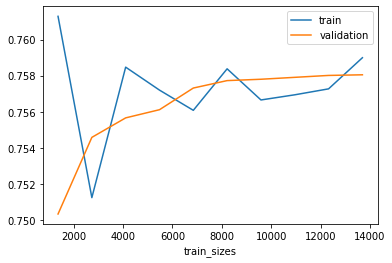

In [261]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Normalisation

1. StandardScaler

In [262]:
from sklearn.preprocessing import StandardScaler


standard_model = linear_model.LinearRegression()
X = new_data.drop('price', axis=1)
y = new_data.price

X_scale =StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y ,test_size=0.2)

standard_model.fit(X_train, y_train)
standard_model.score(X_test,y_test)




0.763378934153258

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


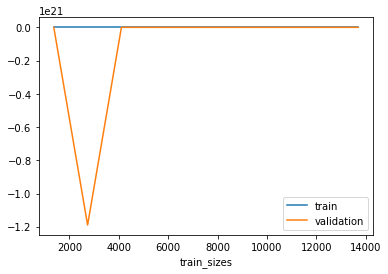

In [263]:
N, train_score, val_score = learning_curve(standard_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()


2. MinMaxScaler

In [264]:

from sklearn.preprocessing import MinMaxScaler

min_max_model = linear_model.LinearRegression()
X = new_data.drop('price', axis=1)
y = new_data.price
X_minmax = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y ,test_size=0.2)
min_max_model.fit(X_train, y_train)
min_max_model.score(X_test,y_test)




0.7528567665363639

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


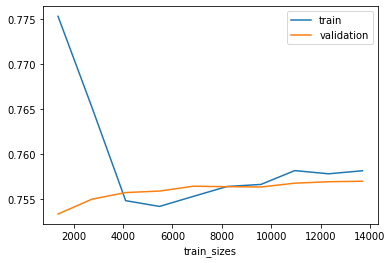

In [265]:
N, train_score, val_score = learning_curve(min_max_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()


3. RobustScaler

In [266]:
from sklearn.preprocessing import RobustScaler

robust_model = linear_model.LinearRegression()
X = new_data.drop('price', axis=1)
y = new_data.price
X_robust = RobustScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_robust, y ,test_size=0.2, shuffle=True)
robust_model.fit(X_train, y_train)
robust_model.score(X_test,y_test)


0.758235436459236

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


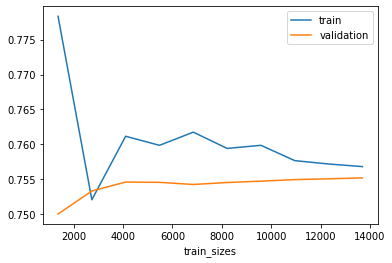

In [267]:
N, train_score, val_score = learning_curve(robust_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Ridge Regression

In [268]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)


X = X_scale
y = new_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test,y_test)

0.7664052151954657

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


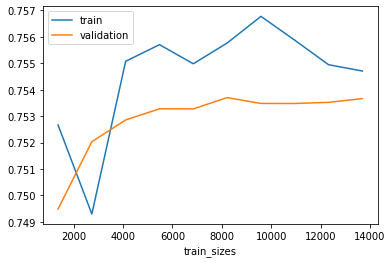

In [269]:
N, train_score, val_score = learning_curve(ridge_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5, shuffle = True)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Lasso Regression

In [270]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5)

X = X_scale
y = new_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test,y_test)

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.507e+12, tolerance: 1.411e+11
  model = cd_fast.enet_coordinate_descent(


0.7484506245831926

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e+11, tolerance: 1.216e+10
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+12, tolerance: 2.328e+10
  model = cd_fast.enet_coordinate_descent(
/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.610e+12, tolerance: 1.137e+11
  model = cd_fast.enet_coordinate_descent(


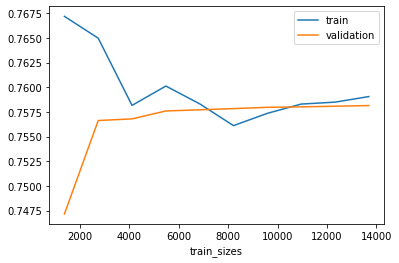

In [271]:
N, train_score, val_score = learning_curve(lasso_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Elasticnet Regression

In [272]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.5)
X = X_scale
y = new_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
elasticnet_model.fit(X_train, y_train)
elasticnet_model.score(X_test,y_test)

0.7531887785729673

[ 1369  2738  4107  5477  6846  8215  9585 10954 12323 13693]


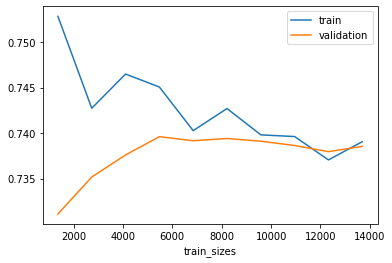

In [273]:
N, train_score, val_score = learning_curve(elasticnet_model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

PolynomialFeatures 

In [274]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=2, include_bias=False)
X = X_scale
y = new_data.price
poly_features = poly_model.fit_transform(X)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_model.score(X_test,y_test)


(21397, 14)


0.7993694840045098

5. Pipelines

In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np


In [276]:
X = new_data.drop('price', axis=1)
y = new_data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model1 = make_pipeline(StandardScaler(), Ridge())

model1.fit(X_train, y_train)
model1.score(X_test, y_test)



0.7555690584464188

In [277]:
y_pred1 = model1.predict(X)

In [278]:
print("MAE : ", mean_absolute_error(y,y_pred1))
print("RMSE : ", np.sqrt(mean_absolute_error(y,y_pred1)))
print('median abs error :', median_absolute_error(y, y_pred1))

MAE :  100604.08319235726
RMSE :  317.181467290189
median abs error : 75628.65413955599


[ 1283  2567  3851  5134  6418  7702  8985 10269 11553 12837]


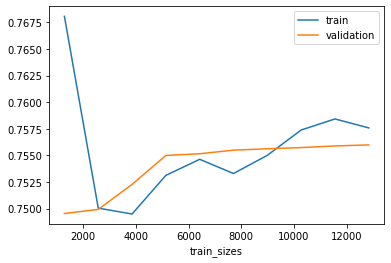

In [279]:
N, train_score, val_score = learning_curve(model1, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [280]:
def prix(model1, sqft_living = 3940, grade = 9, sqft_above = 3940, sqft_living15 = 2370, bathrooms = 3.75, view = 3, sqft_basement = 0, bedrooms = 5.0, lat = 47.6203, waterfront = 0, house_age = 64, zipcode_98004 = 1, zipcode_98039 = 0, zipcode_98040 = 0):
    x = np.array([sqft_living, grade, sqft_above, sqft_living15, bathrooms, view, sqft_basement, bedrooms, lat, waterfront, house_age, zipcode_98004, zipcode_98039, zipcode_98040]).reshape(1,14)
    print(model1.predict(x))

In [281]:
prix(model1)

[1554351.66302997]


/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [282]:
y_pred = model1.predict(X_train)

In [283]:
residual = abs(y_train - y_pred)

In [284]:
residual.sort_values()

6213     1.129540e+01
6509     1.728956e+01
6007     1.911662e+01
20059    2.083881e+01
3461     4.763622e+01
             ...     
149      9.311490e+05
19       9.340504e+05
110      9.383065e+05
28       9.588112e+05
78       1.031628e+06
Name: price, Length: 16047, dtype: float64

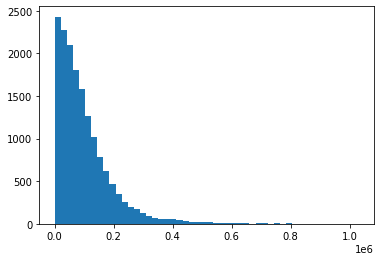

In [285]:

plt.hist(residual, bins = 50)
plt.show()

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


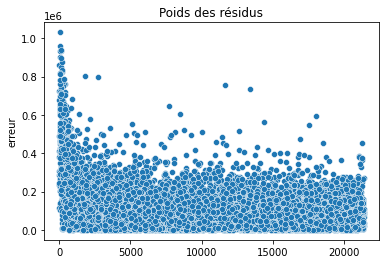

In [286]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [287]:
to_drop = residual[residual > 500000].index

In [288]:
df_cleaned = new_data.drop(to_drop)

In [289]:
df_cleaned

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,house_age,zipcode_98004,zipcode_98039,zipcode_98040
0,1965000.0,3940,9,3940,2370,3.750000,3,0,5.0,47.6203,0,64,1,0,0
1,1960000.0,4430,12,4430,3900,4.000000,0,0,4.0,47.6422,0,17,0,0,0
2,1959000.0,6200,11,5050,3700,4.500000,1,1150,5.0,47.5632,0,26,0,0,1
4,1955000.0,3330,8,1940,3730,1.750000,4,1390,3.0,47.5287,1,55,0,0,1
5,1950000.0,4065,10,4065,3070,3.500000,0,0,4.0,47.6209,0,27,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,82000.0,860,6,860,1140,1.000000,0,0,3.0,47.4987,0,60,0,0,0
21393,81000.0,730,5,730,860,1.000000,0,0,2.0,47.4808,0,72,0,0,0
21394,80000.0,430,4,430,1200,0.750000,0,0,1.0,47.6499,0,102,0,0,0
21395,78000.0,780,5,780,1700,1.000000,0,0,2.0,47.4739,0,72,0,0,0


In [290]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model1 = make_pipeline(StandardScaler(), Ridge())

model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.7753358377494703

6.GridSearchCV

In [291]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),Ridge())
params = {
    #'polynomialfeatures__degree':[2,3,4],
    'ridge__alpha': np.linspace(0, 1, 50)
 
}

grid = GridSearchCV(model, param_grid=params, cv=5)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)





0.7752860909456892

In [292]:
grid.best_score_

0.806782414080431

In [293]:
grid.best_params_

{'ridge__alpha': 0.0}

In [294]:
model_grid = grid.best_estimator_

In [295]:
model_grid.score(X_test, y_test)

0.7752860909456892